<a href="https://colab.research.google.com/github/MisGall10/Practica2_Misael_Gallardo/blob/main/Practica2MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica # 2. Expresiones regulares con Archivos - Misael Adrian Gallardo Cadillo # 255859**

**Objetivo de la practica:**

* Diseñar un código en Google Colab que permita a los estudiantes cargar el archivo `informe_acciones.txt` y extraer información clave utilizando expresiones regulares en Python.



---



# **Extraccion de Informacion con Expresiones Regulares**
Objetivo:

* Analizar información del archivo proporcionado.

**A. Configuracion del Archivo**

Para esta practica emplearemos el archivo `informe_acciones.txt`. Por lo que este debe esta alojado en la carpeta correspondienteo tal y como se muestra en la siguiente figura.

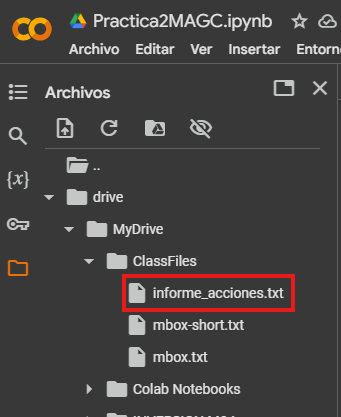

Se debe montar el drive para poder hacer uso del archivo asi como importar las librerías de expresiones regulares (re), estadistica (statistics) y pandas (pandas) a el programa para poder usarlas.

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import re
import statistics
import pandas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**B. Extraccion de Datos con Expresiones Regulares**

Pasos a Implementar:  
1. Usa re para extraer la siguiente información:
Nombre de la empresa: Busca el patrón del nombre en las líneas del asunto.
Fecha del valor de la acción: Encuentra el formato de fecha.
Valor de la acción: Extrae números después de "Valor actual:".
2. Análisis Estadístico:
Para cada empresa extraída:
Encuentra el valor máximo, mínimo, promedio
3. Muestra Resultados al Usuario



In [17]:
# Creamos un diccionario para almacenar los datos que obtendremos
datos_empresas = {}
# Leer el archivo en modo lectura
with open('/content/drive/MyDrive/ClassFiles/informe_acciones.txt', 'r', encoding='ISO-8859-1') as archivo:
  for linea in archivo:
    linea = linea.rstrip()
# Extraer los nombres de la empresas y los almacenamos en el diccionario
    empresa_match = re.search(r'Informe de Acción - (\w+)', linea)
    if empresa_match:
      empresa = empresa_match.group(1)
      if empresa not in datos_empresas:
        datos_empresas[empresa] = {'fechas': [], 'valores': []}
# Extraemos las fechas de las acciones y las guardamos en el diccionario
    fecha_match = re.search(r'Fecha: (\d{4}-\d{2}-\d{2})', linea)
    if fecha_match:
      fecha = fecha_match.group(1)
      datos_empresas[empresa]['fechas'].append(fecha)
# Extraer el valor de la acción y las guardamos en el diccionario
    valor_match = re.search(r'Valor actual: \$(\d+\.\d+)', linea)
    if valor_match:
      valor = float(valor_match.group(1))
      datos_empresas[empresa]['valores'].append(valor)
# Crear una lista para almacenar los resultados obtenido
resultados = []
# Aplicamos el analisis estadisticos
for empresa, datos in datos_empresas.items():
  max_valor = max(datos['valores'])
  min_valor = min(datos['valores'])
  promedio_valor = statistics.mean(datos['valores'])
  fecha_mas_reciente = max(datos['fechas'])
#Agregamos los datos al la lista de resultados
  resultados.append({
'Empresa': empresa,
'Fecha más reciente': fecha_mas_reciente,
'Valor Máx ($)': f"${max_valor:.2f}",
'Valor Mín ($)': f"${min_valor:.2f}",
'Promedio ($)': f"${promedio_valor:.2f}"
})
# Crear un DataFrame con pandas
df = pandas.DataFrame(resultados)
# Imprimimos le data frame
print(df)

   Empresa Fecha más reciente Valor Máx ($) Valor Mín ($) Promedio ($)
0     CSCO         2024-09-02      $1499.73       $104.72      $794.88
1     AMZN         2024-09-02      $1498.27       $103.83      $762.75
2     NVDA         2024-09-02      $1496.06       $103.26      $806.61
3      MRK         2024-09-02      $1495.62       $102.43      $804.27
4     MSFT         2024-09-02      $1494.97       $104.05      $819.01
5       HD         2024-09-02      $1490.53       $101.10      $798.42
6      CRM         2024-09-02      $1497.80       $106.33      $816.63
7      XOM         2024-09-02      $1498.51       $104.62      $822.57
8       MA         2024-09-02      $1499.99       $102.26      $802.10
9     INTC         2024-09-02      $1489.20       $103.85      $782.32
10   GOOGL         2024-09-02      $1497.57       $101.77      $783.62
11       T         2024-09-02      $1499.95       $101.37      $777.28
12    META         2024-09-02      $1495.69       $100.47      $776.37
13    